# Performed Exploratory Data Analysis and Statistical Analysis On Sports Analytics

## Table of Content (click below to move to given sections)

1. **[Data Preprocessing](#DataPreprocessing)**
2. **[Data Understanding](#DataUnderstanding)**
3. **[Data Analysis](#ExploratoryDataAnalysis)**
4. **[Summary](#Summary)**
5. **[Statistical Analysis](#StatisticalAnalysis)**

<a id="DataPreprocessing"> </a>
## **A. Data Preprocessing**

**Import the necessary libraries and read the data.**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore 
import statsmodels.formula.api as sma
import statsmodels.stats.anova as smodels

In [62]:
fifa_variable_info=pd.read_csv('fifa_ variable_information.csv')
fifa_variable_info 

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


In [63]:
fifa=pd.read_csv('fifa.csv')
fifa.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [64]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

**Droping columns that seem unecessary for analysis.**

In [65]:
#2.  Photo  Flag  Club Logo  preferred foot  weak foot  body type  jersey number  
fifa.drop(['ID','Photo', 'Flag' ,'Club' , 'Club Logo','Body Type','Loaned From', 'Jersey Number', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', ],axis=1, inplace=True)
fifa.shape

(18207, 18)

In [66]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,RF,"Jul 1, 2004",2021,5'7,159lbs,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,ST,"Jul 10, 2018",2022,6'2,183lbs,€127.1M
2,Neymar Jr,26,Brazil,92,93,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,LW,"Aug 3, 2017",2022,5'9,150lbs,€228.1M
3,De Gea,27,Spain,91,93,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,GK,"Jul 1, 2011",2020,6'4,168lbs,€138.6M
4,K. De Bruyne,27,Belgium,91,92,€102M,€355K,Right,4.0,5.0,4.0,High/ High,RCM,"Aug 30, 2015",2023,5'11,154lbs,€196.4M


**The following columns need to be converted for further analysis:**


In [68]:
#1 Value
fifa['Value'].replace(regex=['K','M','€'],value='', inplace=True)
fifa['Value']=fifa['Value'].astype(float)

In [69]:
#2 Wage
fifa['Wage'].replace(regex=['K','M','€'],value='', inplace=True)
fifa['Wage']=fifa['Wage'].astype(float)

In [70]:
#3 joined
fifa['Joined']=fifa['Joined'].replace(',','')
fifa['Joined']=pd.to_datetime(fifa['Joined'])
fifa['Joined']=fifa['Joined'].dt.year
fifa['Joined']=fifa['Joined'].astype(pd.Int32Dtype())
fifa['Joined'].dtype

Int32Dtype()

In [71]:
#4 Contract Valid Until datetime
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'])
fifa['Contract Valid Until'].dtype

dtype('<M8[ns]')

In [72]:
#5  Height
fifa['Height']=fifa['Height'].str.replace("'","")
fifa['Height']=fifa['Height'].astype(float)
fifa['Height'].dtype

dtype('float64')

In [73]:
#6  Weight
fifa['Weight']=fifa['Weight'].str.replace('lbs','')
fifa['Weight']=fifa['Weight'].astype(float)
fifa['Weight'].dtype

dtype('float64')

In [74]:
#7  Release Clause
fifa['Release Clause'].replace(regex=['K','M','€'],value='', inplace=True)
fifa['Release Clause']=fifa['Release Clause'].astype(float)

**Check for missing values and do a mean imputation where necessary.**

In [75]:
fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Position                      60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Release Clause              1564
dtype: int64

In [76]:
#4 Joined 1553 , Contract Valid Until 289 , Height 48 , Weight 48 , Release Clause 1564
fifa_null=pd.DataFrame(fifa.isnull().sum(), columns = ['null_count'])

In [77]:
fifa_null['null_percentage']=fifa_null['null_count']/len(fifa)*100
fifa_null

,null_count,null_percentage
Name,0,0.000000
Age,0,0.000000
Nationality,0,0.000000
Overall,0,0.000000
Potential,0,0.000000
Value,0,0.000000
Wage,0,0.000000
Preferred Foot,48,0.263635
International Reputation,48,0.263635
Weak Foot,48,0.263635


In [78]:
fifa.dropna(thresh=4)
fifa.shape

(18207, 18)

In [79]:
nan_value = float("NaN")
fifa[['Value','Wage']].replace(0, nan_value, inplace=True)

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [80]:
fifa.dropna(subset = ['Position', 'Value','Wage'],inplace=True)
fifa.shape

(18147, 18)

In [81]:
fifa['Height']=fifa['Height'].fillna(value=fifa['Height'].mean())

In [82]:
fifa['Weight']=fifa['Weight'].fillna(value=fifa['Weight'].mean())

In [83]:
fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Position                       0
Joined                      1493
Contract Valid Until         229
Height                         0
Weight                         0
Release Clause              1504
dtype: int64

In [84]:
# we will keep the information about players even if their joined,contract details and release clause are missing.

# 

<a id="DataUnderstanding"> </a>
## B. Data Understanding

In [85]:
# fifa.info()
fifa.describe(include='object')

,Name,Nationality,Preferred Foot,Work Rate,Position
count,18147,18147,18147,18147,18147
unique,17140,164,2,9,27
top,J. Rodríguez,England,Right,Medium/ Medium,ST
freq,11,1657,13938,9804,2152


In [86]:
fifa.describe(include='number')
fifa.nlargest(20,['Overall']).describe()
# fifa['Position'].unique
# obseravtion : 
# The datset has 18207 records from 164 different nationality from 651 club .
# Out of 18207 players only 217 unique Values are there.
# Out of 18207 players only 144 have unique wage amount.
# These players have 27 different positions.

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Joined,Height,Weight,Release Clause
count,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,28.300000,90.50000,91.50000,76.075000,289.700000,3.900000,3.60000,3.100000,2012.850000,105.300000,171.500000,148.135000
std,2.939746,1.50438,1.50438,19.566536,119.321371,0.718185,0.88258,1.333772,3.745524,138.596385,17.798581,37.362059
min,24.000000,89.00000,90.00000,44.000000,94.000000,3.000000,2.00000,1.000000,2004.000000,56.000000,146.000000,90.200000
25%,26.000000,89.00000,90.00000,62.250000,205.000000,3.000000,3.00000,2.000000,2010.750000,58.750000,159.000000,122.800000
50%,27.000000,90.00000,91.00000,76.750000,272.500000,4.000000,4.00000,3.500000,2014.000000,60.000000,168.000000,141.550000
75%,31.250000,91.00000,93.00000,84.875000,361.250000,4.000000,4.00000,4.000000,2015.000000,62.000000,184.000000,164.450000
max,33.000000,94.00000,94.00000,118.500000,565.000000,5.000000,5.00000,5.000000,2018.000000,511.000000,212.000000,228.100000


**Quick Glance for top Players for each position**

In [87]:
fifa_top_players=fifa.nlargest(18207,['Overall']) # can be use to see top 20 players or any number you want to look for
fifa_top_players_2020=fifa_top_players[fifa_top_players['Contract Valid Until']=='2020']
selected_players=fifa_top_players_2020.sort_values(['Position','Overall'], ascending=False).groupby('Position').head(1).sort_values('Overall',ascending=False)
selected_players

,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
6,L. Modrić,32,Croatia,91,91,67.0,420.0,Right,4.0,4.0,4.0,High/ High,RCM,2012,2020-01-01,58.0,146.0,137.4
3,De Gea,27,Spain,91,93,72.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020-01-01,64.0,168.0,138.6
5,E. Hazard,27,Belgium,91,91,93.0,340.0,Right,4.0,4.0,4.0,High/ Medium,LF,2012,2020-01-01,58.0,163.0,172.1
8,Sergio Ramos,32,Spain,91,91,51.0,380.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2005,2020-01-01,60.0,181.0,104.6
13,David Silva,32,Spain,90,90,60.0,285.0,Left,4.0,2.0,4.0,High/ Medium,LCM,2010,2020-01-01,58.0,148.0,111.0
21,E. Cavani,31,Uruguay,89,89,60.0,200.0,Right,4.0,4.0,3.0,High/ High,LS,2013,2020-01-01,61.0,170.0,111.0
24,G. Chiellini,33,Italy,89,89,27.0,215.0,Left,4.0,3.0,2.0,Medium/ High,LCB,2005,2020-01-01,62.0,187.0,44.6
31,C. Eriksen,26,Denmark,88,91,73.5,205.0,Right,3.0,5.0,4.0,High/ Medium,CAM,2013,2020-01-01,511.0,168.0,141.5
50,D. Mertens,31,Belgium,87,87,45.0,135.0,Right,3.0,4.0,4.0,High/ Low,RF,2013,2020-01-01,57.0,134.0,76.5
49,Jordi Alba,29,Spain,87,87,38.0,250.0,Left,3.0,3.0,3.0,High/ Medium,LB,2012,2020-01-01,57.0,150.0,77.9


### Insights

<a id="ExploratoryDataAnalysis"> </a>
## C. Data Analysis

**1.	Plot the distribution of Overall rating for all players.**

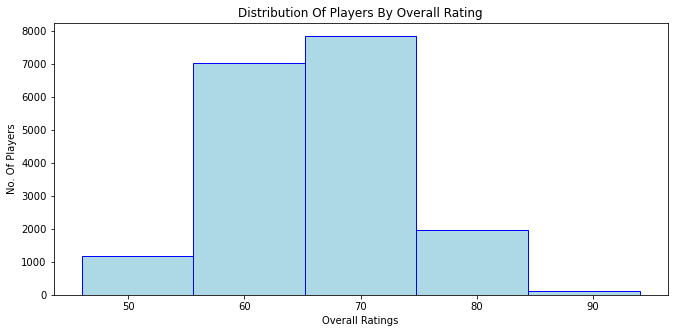

In [88]:
plt.figure(figsize=(11,5))
plt.hist(fifa['Overall'],bins= 5 , color='lightblue' ,edgecolor='blue')
plt.title("Distribution Of Players By Overall Rating")
plt.ylabel("No. Of Players")
plt.xlabel('Overall Ratings')
plt.show()

In [89]:
#obsevation 
# the distribution of rank is concentrated between 55 and 75 , most players ranked between this range.
# there are very few players who ranked more than 85 .

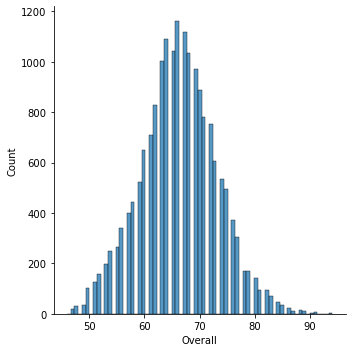

In [90]:
sns.displot(fifa['Overall']) # data spread has symmetric distribution.

**2. Generate pair plots for the following variables:Overall, Value, Wage, International Reputation, Release Clause**

In [91]:
fifa.describe(include='number')

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Joined,Height,Weight,Release Clause
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,16654.000000,18147.000000,18147.000000,16643.000000
mean,25.121122,66.253926,71.324076,264.965851,9.759024,1.113297,2.947154,2.361492,2016.459829,175.316140,165.982972,228.201274
std,4.669796,6.913320,6.132286,289.865229,22.030250,0.394150,0.660498,0.756274,2.105924,196.306997,15.593388,299.251866
min,16.000000,46.000000,48.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1991.000000,51.000000,110.000000,1.000000
25%,21.000000,62.000000,67.000000,4.400000,1.000000,1.000000,3.000000,2.000000,2016.000000,59.000000,154.000000,2.500000
50%,25.000000,66.000000,71.000000,160.000000,3.000000,1.000000,3.000000,2.000000,2017.000000,61.000000,165.000000,19.800000
75%,28.000000,71.000000,75.000000,475.000000,9.000000,1.000000,3.000000,3.000000,2018.000000,510.000000,176.000000,431.000000
max,45.000000,94.000000,95.000000,975.000000,565.000000,5.000000,5.000000,5.000000,2018.000000,511.000000,243.000000,999.000000


In [92]:
fifa_var=fifa[['Age','Overall','Potential','Value', 'Wage', 'International Reputation', 'Weak Foot','Skill Moves', 'Release Clause']]
fifa_var.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Release Clause
0,31,94,94,110.5,565.0,5.0,4.0,4.0,226.5
1,33,94,94,77.0,405.0,5.0,4.0,5.0,127.1
2,26,92,93,118.5,290.0,5.0,5.0,5.0,228.1
3,27,91,93,72.0,260.0,4.0,3.0,1.0,138.6
4,27,91,92,102.0,355.0,4.0,5.0,4.0,196.4


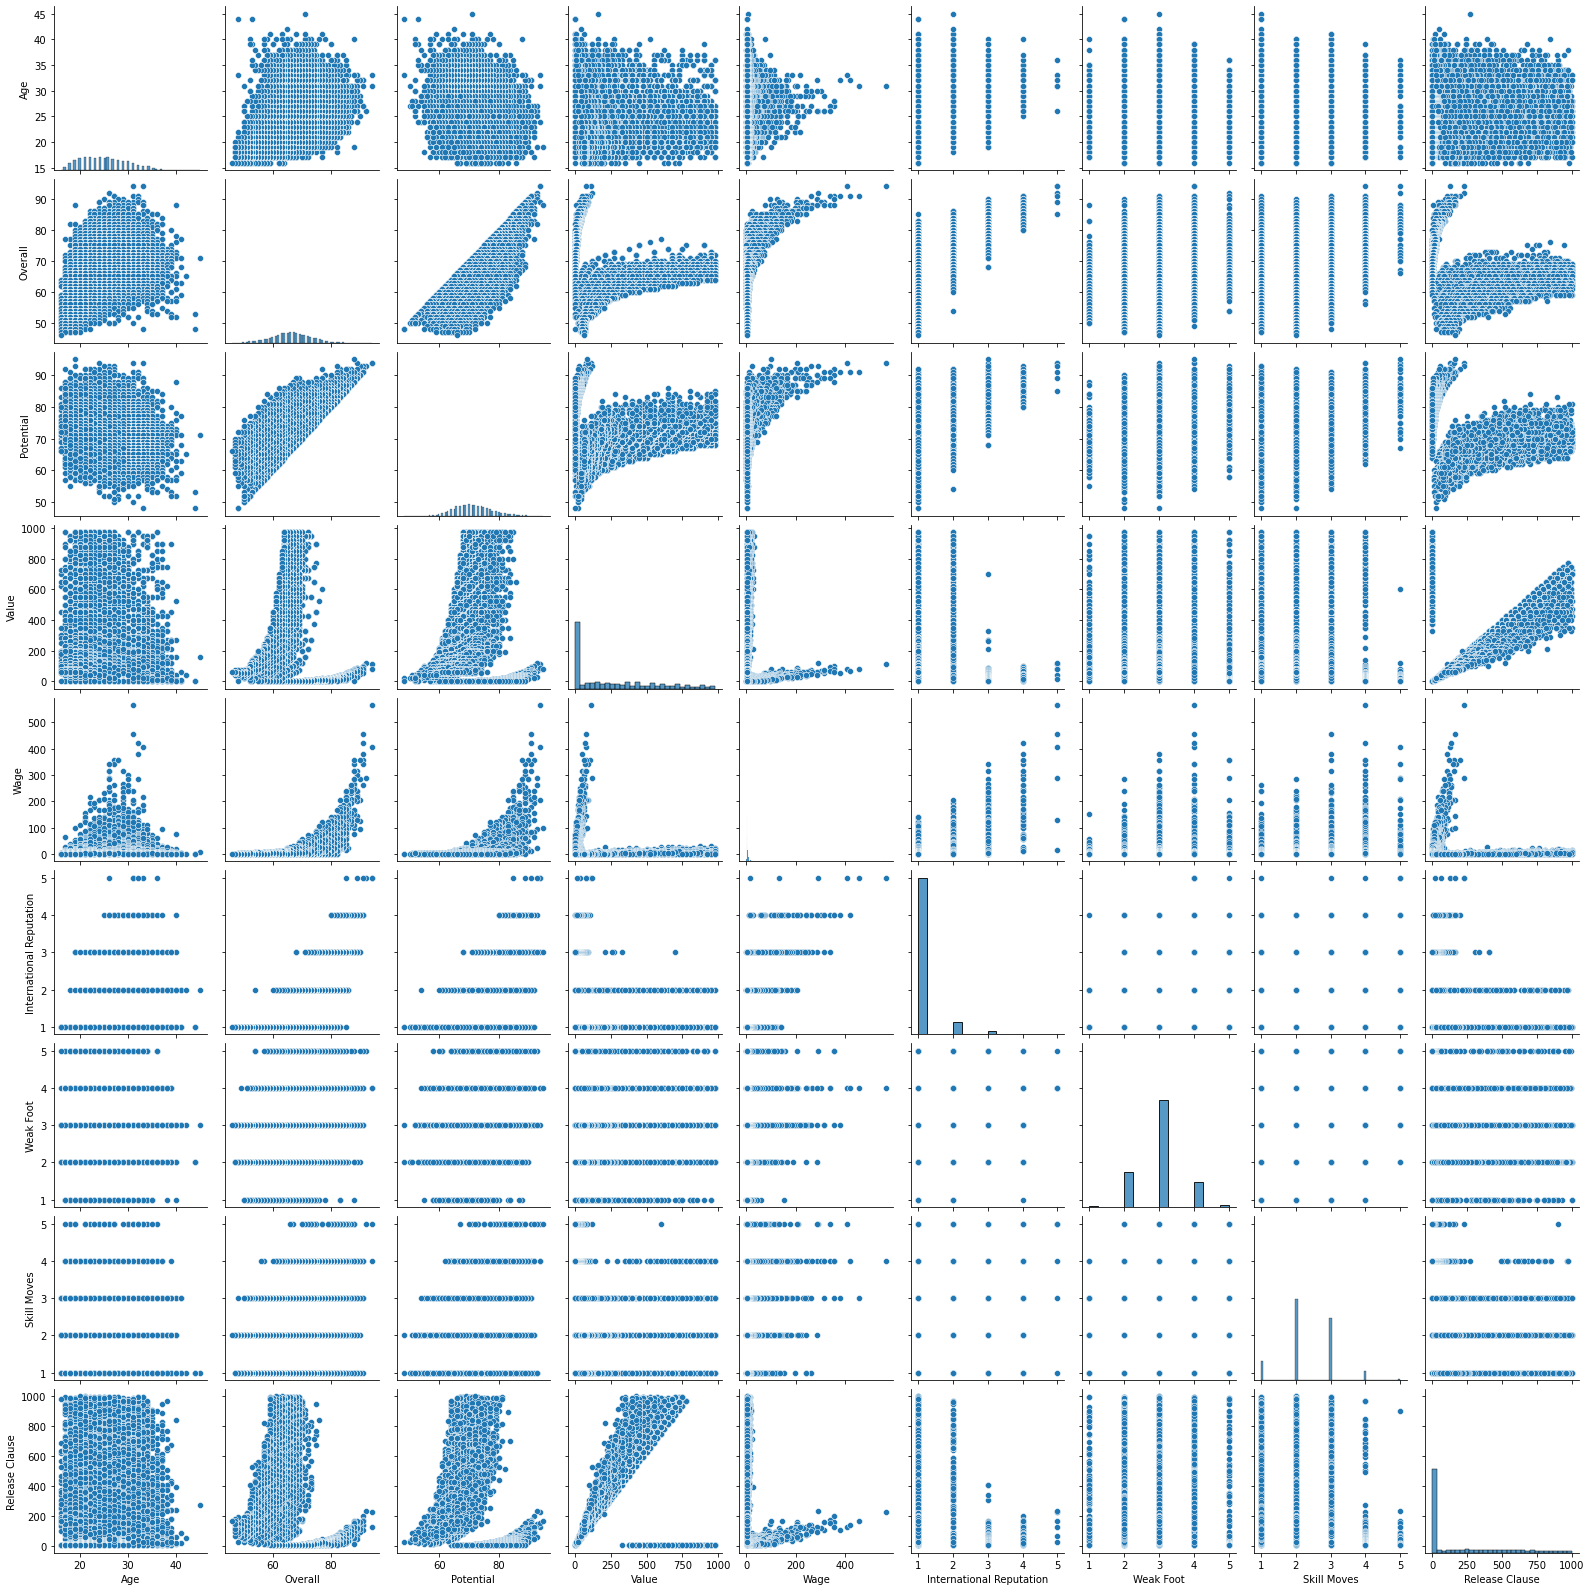

In [93]:
sns.pairplot(fifa_var)
# overall n count data appear to be normally distriubuted 
# as the value increases and overall ratings also increases 
# as the overall rating increases and wage also increases
# The amount of release clause is increasing as the value and overall rating increases
plt.show()

**3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.**

In [94]:
fifa3=fifa[fifa['Contract Valid Until']=='2020']

In [95]:
top_overall=fifa3.nlargest(20,'Overall')   
top_overall

,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
3,De Gea,27,Spain,91,93,72.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020-01-01,64.0,168.0,138.6
5,E. Hazard,27,Belgium,91,91,93.0,340.0,Right,4.0,4.0,4.0,High/ Medium,LF,2012,2020-01-01,58.0,163.0,172.1
6,L. Modrić,32,Croatia,91,91,67.0,420.0,Right,4.0,4.0,4.0,High/ High,RCM,2012,2020-01-01,58.0,146.0,137.4
8,Sergio Ramos,32,Spain,91,91,51.0,380.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2005,2020-01-01,60.0,181.0,104.6
13,David Silva,32,Spain,90,90,60.0,285.0,Left,4.0,2.0,4.0,High/ Medium,LCM,2010,2020-01-01,58.0,148.0,111.0
21,E. Cavani,31,Uruguay,89,89,60.0,200.0,Right,4.0,4.0,3.0,High/ High,LS,2013,2020-01-01,61.0,170.0,111.0
24,G. Chiellini,33,Italy,89,89,27.0,215.0,Left,4.0,3.0,2.0,Medium/ High,LCB,2005,2020-01-01,62.0,187.0,44.6
31,C. Eriksen,26,Denmark,88,91,73.5,205.0,Right,3.0,5.0,4.0,High/ Medium,CAM,2013,2020-01-01,511.0,168.0,141.5
39,Thiago Silva,33,Brazil,88,88,24.0,165.0,Right,4.0,3.0,2.0,Medium/ High,RCB,2012,2020-01-01,60.0,181.0,44.4
46,K. Navas,31,Costa Rica,87,87,30.5,195.0,Right,3.0,3.0,1.0,Medium/ Medium,GK,2014,2020-01-01,61.0,176.0,62.5


**a)	What would the average wage for this set of players be?**

In [96]:
top_overall['Wage'].mean()

205.15

**b)	What is the average age?**

In [97]:
top_overall['Age'].mean()

29.95

**c)	Is there a correlation between the Overall rating and Value for these players?**

In [98]:
top_overall[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.666788
Value,0.666788,1.000000


<AxesSubplot:>

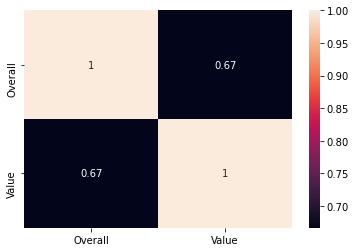

In [99]:
sns.heatmap(top_overall[['Overall','Value']].corr(),annot=True)

**4.	Generate tables containing the top 5 players by Overall rating for each unique position.**

In [101]:
top_players_each_post=fifa.sort_values(['Overall','Potential'], ascending = False).groupby('Position').head(5)
top_players_each_post['mean_wage'] = top_players_each_post.groupby('Position')['Wage'].transform(np.mean)
top_players_each_post[['Name','Position','Overall','Wage']].sort_values(['Position','Overall','Wage'] , ascending = False)

,Name,Position,Overall,Wage
1,Cristiano Ronaldo,ST,94,405.0
10,R. Lewandowski,ST,90,205.0
23,S. Agüero,ST,89,300.0
16,H. Kane,ST,89,205.0
36,G. Bale,ST,88,355.0
...,...,...,...,...
17,A. Griezmann,CAM,89,145.0
31,C. Eriksen,CAM,88,205.0
61,Roberto Firmino,CAM,86,195.0
74,M. Özil,CAM,86,190.0


**5. Are there any players appearing in more than one Table?**

In [102]:
duplicate = fifa[fifa.duplicated()]

In [103]:
duplicate

,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause


**6. What is the average wage one can expect to pay for the top 5 in every position?**

In [104]:
top_players_each_post['Wage'].mean() 

151.57037037037037

In [105]:
potential_players_avg_wage=top_players_each_post[['Position','Wage']].groupby('Position')['Wage'].agg(Mean='mean', Min='min', Max='max', Std='std')
potential_players_avg_wage

,Mean,Min,Max,Std
Position,,,,
CAM,174.0,135.0,205.0,31.701735
CB,139.6,38.0,205.0,63.547620
CDM,217.0,120.0,315.0,80.669077
CF,47.4,15.0,71.0,22.645088
CM,130.6,73.0,175.0,38.720795
GK,192.8,94.0,260.0,75.294090
LAM,81.6,13.0,315.0,130.639963
LB,177.2,81.0,285.0,88.015340
LCB,162.0,115.0,215.0,35.637059


In [106]:
potential_players_avg_wage.shape

(27, 4)

<a id="Summary"> </a>
# D. Summary
### Team Selection on different Parameters

**1. Top players (maximum=5) for each position**

In [107]:
top_players_each_post=fifa.sort_values(['Overall','Potential'], ascending = False).groupby('Position').head(5)
top_players_each_post['mean_wage'] = top_players_each_post.groupby('Position')['Wage'].transform(np.mean)
top_players_each_post

,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,mean_wage
0,L. Messi,31,Argentina,94,94,110.5,565.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,2004,2021-01-01,57.0,159.0,226.5,148.0
1,Cristiano Ronaldo,33,Portugal,94,94,77.0,405.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,2022-01-01,62.0,183.0,127.1,294.0
2,Neymar Jr,26,Brazil,92,93,118.5,290.0,Right,5.0,5.0,5.0,High/ Medium,LW,2017,2022-01-01,59.0,150.0,228.1,261.0
3,De Gea,27,Spain,91,93,72.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020-01-01,64.0,168.0,138.6,192.8
4,K. De Bruyne,27,Belgium,91,92,102.0,355.0,Right,4.0,5.0,4.0,High/ High,RCM,2015,2023-01-01,511.0,154.0,196.4,240.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,C. Ciano,28,Italy,75,75,6.5,17.0,Left,1.0,4.0,4.0,High/ Medium,RF,2017,2021-01-01,59.0,161.0,11.7,148.0
2242,Jacson Zonta,34,Brazil,74,74,2.8,13.0,Right,1.0,4.0,3.0,Medium/ Medium,RAM,2018,2021-01-01,511.0,163.0,5.4,45.4
2247,Leo Caldeirinha,34,Brazil,74,74,2.8,13.0,Left,1.0,3.0,4.0,Medium/ Medium,LAM,2018,2021-01-01,59.0,165.0,5.4,81.6
2322,Sebas Couteira,30,Brazil,74,74,5.5,14.0,Right,1.0,4.0,4.0,Medium/ Medium,RAM,2018,2021-01-01,510.0,154.0,10.5,45.4


In [108]:
top_players_each_post.shape

(135, 19)

**2. Top player for each position according to overall rank and potential for a Team**

In [110]:
fifa1=top_players_each_post.sort_values(['Position','Overall'], ascending = False).groupby('Position').head(1)
fifa1[['Name','Overall','Potential','Position','Value', 'Wage','mean_wage']]


,Name,Overall,Potential,Position,Value,Wage,mean_wage
1,Cristiano Ronaldo,94,94,ST,77.0,405.0,294.0
450,M. Ginter,80,82,RWB,15.5,28.0,44.2
56,Bernardo Silva,86,91,RW,59.5,180.0,202.0
7,L. Suárez,91,91,RS,80.0,455.0,132.2
25,K. Mbappé,88,95,RM,81.0,100.0,131.4
0,L. Messi,94,94,RF,110.5,565.0,148.0
45,P. Pogba,87,91,RDM,64.0,210.0,105.0
4,K. De Bruyne,91,92,RCM,102.0,355.0,240.8
8,Sergio Ramos,91,91,RCB,51.0,380.0,229.0
69,Azpilicueta,86,86,RB,35.0,175.0,155.4


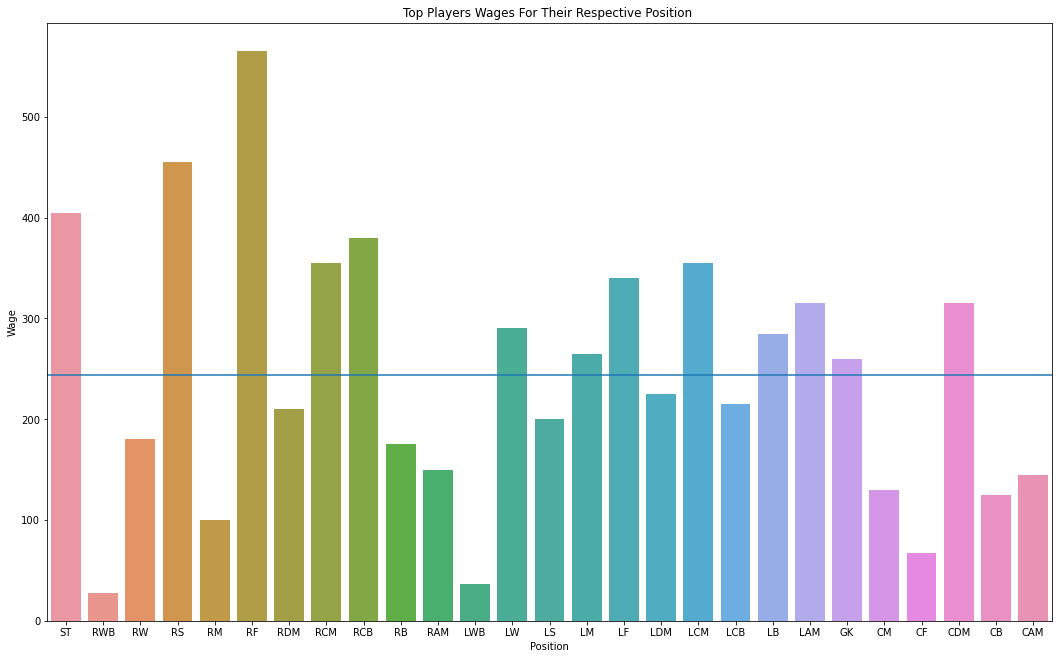

In [111]:
plt.figure(figsize=(18,11))
sns.barplot(x= fifa1['Position'] ,y=fifa1['Wage'])
plt.axhline(fifa1['Wage'].mean(),label='Avg')
plt.title('Top Players Wages For Their Respective Position ')
plt.show()

In [112]:
fifa[(fifa['Overall']>88)&(fifa['Position']=='ST')]  # second best option for RF

,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
1,Cristiano Ronaldo,33,Portugal,94,94,77.0,405.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,2022-01-01,62.0,183.0,127.1
10,R. Lewandowski,29,Poland,90,90,77.0,205.0,Right,4.0,4.0,4.0,High/ Medium,ST,2014,2021-01-01,60.0,176.0,127.1
16,H. Kane,24,England,89,91,83.5,205.0,Right,3.0,4.0,3.0,High/ High,ST,2010,2024-01-01,62.0,196.0,160.7
23,S. Agüero,30,Argentina,89,89,64.5,300.0,Right,4.0,4.0,4.0,High/ Medium,ST,2011,2021-01-01,58.0,154.0,119.3


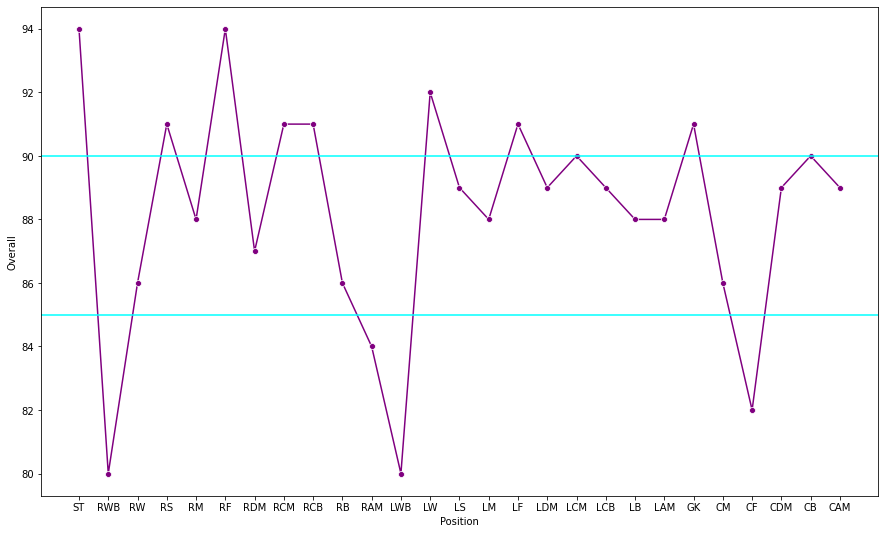

In [113]:
plt.figure(figsize=(15,9))
sns.lineplot(x= fifa1['Position'] , y=fifa1['Overall'], marker='o', color='purple')
plt.axhline(85,color='cyan')
plt.axhline(90,color='cyan')
plt.show()

**7.Top player(under limited budget) for each position according to wage for a Team**

In [114]:
fifa1=top_players_each_post.sort_values(['Position','Wage'], ascending = True).groupby('Position').head(1)
fifa1[['Name','Overall','Potential','Position','Value', 'Wage','mean_wage']]
fifa1.shape

(27, 19)

**8. Top 20 players whose contracts are valid until 2020**

In [115]:
top_overall=fifa[fifa['Contract Valid Until']=='2020'].nlargest(20,'Overall')   
top_overall

,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
3,De Gea,27,Spain,91,93,72.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020-01-01,64.0,168.0,138.6
5,E. Hazard,27,Belgium,91,91,93.0,340.0,Right,4.0,4.0,4.0,High/ Medium,LF,2012,2020-01-01,58.0,163.0,172.1
6,L. Modrić,32,Croatia,91,91,67.0,420.0,Right,4.0,4.0,4.0,High/ High,RCM,2012,2020-01-01,58.0,146.0,137.4
8,Sergio Ramos,32,Spain,91,91,51.0,380.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2005,2020-01-01,60.0,181.0,104.6
13,David Silva,32,Spain,90,90,60.0,285.0,Left,4.0,2.0,4.0,High/ Medium,LCM,2010,2020-01-01,58.0,148.0,111.0
21,E. Cavani,31,Uruguay,89,89,60.0,200.0,Right,4.0,4.0,3.0,High/ High,LS,2013,2020-01-01,61.0,170.0,111.0
24,G. Chiellini,33,Italy,89,89,27.0,215.0,Left,4.0,3.0,2.0,Medium/ High,LCB,2005,2020-01-01,62.0,187.0,44.6
31,C. Eriksen,26,Denmark,88,91,73.5,205.0,Right,3.0,5.0,4.0,High/ Medium,CAM,2013,2020-01-01,511.0,168.0,141.5
39,Thiago Silva,33,Brazil,88,88,24.0,165.0,Right,4.0,3.0,2.0,Medium/ High,RCB,2012,2020-01-01,60.0,181.0,44.4
46,K. Navas,31,Costa Rica,87,87,30.5,195.0,Right,3.0,3.0,1.0,Medium/ Medium,GK,2014,2020-01-01,61.0,176.0,62.5


**9. Top 20 players for each position whose contracts are valid until 2020**

In [116]:
players_2020=fifa[fifa['Contract Valid Until']=='2020']
team_players=players_2020.sort_values(['Position','Overall'], ascending=False).groupby('Position').head(1).sort_values('Overall',ascending=False)
team_players

,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
6,L. Modrić,32,Croatia,91,91,67.0,420.0,Right,4.0,4.0,4.0,High/ High,RCM,2012,2020-01-01,58.0,146.0,137.4
3,De Gea,27,Spain,91,93,72.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020-01-01,64.0,168.0,138.6
5,E. Hazard,27,Belgium,91,91,93.0,340.0,Right,4.0,4.0,4.0,High/ Medium,LF,2012,2020-01-01,58.0,163.0,172.1
8,Sergio Ramos,32,Spain,91,91,51.0,380.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2005,2020-01-01,60.0,181.0,104.6
13,David Silva,32,Spain,90,90,60.0,285.0,Left,4.0,2.0,4.0,High/ Medium,LCM,2010,2020-01-01,58.0,148.0,111.0
21,E. Cavani,31,Uruguay,89,89,60.0,200.0,Right,4.0,4.0,3.0,High/ High,LS,2013,2020-01-01,61.0,170.0,111.0
24,G. Chiellini,33,Italy,89,89,27.0,215.0,Left,4.0,3.0,2.0,Medium/ High,LCB,2005,2020-01-01,62.0,187.0,44.6
31,C. Eriksen,26,Denmark,88,91,73.5,205.0,Right,3.0,5.0,4.0,High/ Medium,CAM,2013,2020-01-01,511.0,168.0,141.5
50,D. Mertens,31,Belgium,87,87,45.0,135.0,Right,3.0,4.0,4.0,High/ Low,RF,2013,2020-01-01,57.0,134.0,76.5
49,Jordi Alba,29,Spain,87,87,38.0,250.0,Left,3.0,3.0,3.0,High/ Medium,LB,2012,2020-01-01,57.0,150.0,77.9


In [117]:
fifa_selected_players=fifa1[['Name','Overall','Potential','Position','Value', 'Wage','mean_wage']]
fifa_selected_players.to_csv('fifa_selected_players.csv')

---

<a id="StatisticalAnalysis"> </a>
# Statistical Analysis

**Is there any evidence that the players overall rating is greater than 80?**

In [118]:
# one sample t test

# Ho: μ <= 80
# Ha : μ >  80

mu =80
data = fifa['Overall']
test = stats.ttest_1samp(data,mu)
print('Test Statistic:',test[0])
print('p_value:',1-(test[1]/2))

Test Statistic: -267.8516975417599
p_value: 1.0


In [119]:
# Since p_value > 0.05(5% Significance level). Null Hypothesis is not rejected i.e Alternate Hypothesis 
# is not selected. 

# Inference: Overall rating is less than 80.

**The statistical test to identify whether preferred foot has any impact on potential.**




In [120]:
fifa['Preferred Foot'].value_counts()

Right    13938
Left      4209
Name: Preferred Foot, dtype: int64

In [121]:
left=fifa[fifa['Preferred Foot']=='Left']
right=fifa[fifa['Preferred Foot']=='Right']

In [122]:
# Ho: μ_right =  μ_left (No difference in potential with respect to preffered foot)
# Ha : μ_right ≠  μ_left  (Significant difference in potential with respect to preffered foot)


test = stats.ttest_ind(fifa['Potential'],fifa['Potential'])
print('Test Statistic:',test[0])
print('p_value:',test[1])



Test Statistic: 0.0
p_value: 1.0


In [123]:
# Since p_value > 0.05(5% Significance level). Null Hypothesis is not rejected i.e Alternate Hypothesis 
# is not selected. 

# Inference: No difference is potential with respect to preffered foot.

**The statistical test to identify the relation between the overall rating and potential. [Both are continuous data points].**

In [124]:
# Ho: r = 0 (No correlation between Overall rating and Potential)
# Ha : r ≠ 0  (There exsist correlation between Overall rating and Potential)


test = stats.pearsonr(fifa['Overall'],fifa['Potential'])
print('Test Statistic:',test[0])
print('p_value:',test[1])



Test Statistic: 0.660946795904302
p_value: 0.0


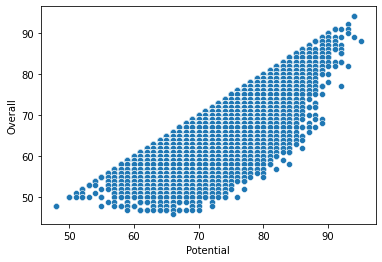

In [125]:
sns.scatterplot(y='Overall',x='Potential',data=fifa)
plt.show()

In [126]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Correlation between Overall rating and Potential.

**Does skill move and week foot has any effect in overall rating. Graphical analysis and the statistical analysis.**

In [127]:
fifa['Skill Moves'].value_counts()

2.0    8556
3.0    6598
1.0    2025
4.0     917
5.0      51
Name: Skill Moves, dtype: int64

In [128]:
skm_1=fifa[fifa['Skill Moves']==1]['Overall']
skm_2=fifa[fifa['Skill Moves']==2]['Overall']
skm_3=fifa[fifa['Skill Moves']==3]['Overall']
skm_4=fifa[fifa['Skill Moves']==4]['Overall']
skm_5=fifa[fifa['Skill Moves']==5]['Overall']

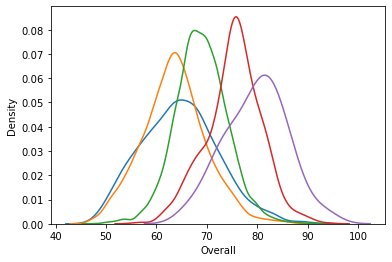

In [134]:
# Graphical Understanding:

sns.kdeplot(skm_1,label='Skill move 1')
sns.kdeplot(skm_2,label='Skill move 2')
sns.kdeplot(skm_3,label='Skill move 3')
sns.kdeplot(skm_4,label='Skill move 4')
sns.kdeplot(skm_5,label='Skill move 5')
plt.show()


In [130]:
# Inference: Skill move 4 and 5 is significantly different from other skill moves.

In [131]:
# Ho: All the skill moves ratings are equal 
#     (No difference in overall rating with respect to skillmove)


# Ha: Atleast one of the skill moves ratings is different 
#     (Difference in overall rating with respect to skillmove)



test = stats.f_oneway(skm_1,skm_2,skm_3,skm_4,skm_4)
print('Test Statistic:',test[0])
print('p_value:',test[1])


Test Statistic: 1772.8960624251376
p_value: 0.0


In [132]:
# Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis 
# is selected. 

# Inference: Difference is overall rating with respect to skillmoves.

# Further post_hoc analysis is required to find which skillmove is different.

----